## GRIP - THE SPARKS FOUNDATION

## Data Science and Business Analytics Tasks - May 2021

#### Task 1: Prediction using Supervised ML - <font color='blue'>Preapared by Keerthivas Balasubramaniam</font>

### 1. Preparing the required Libaries

In [1]:
# Importing the required libraries for this Task
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
# Filtering out the warnings
import warnings
warnings.filterwarnings('ignore')

### 2. Preparing the DataFrame from the provided URL

In [3]:
# Reading and Understanding the data from the provided URL
url = 'http://bit.ly/w-data'
task1_df = pd.read_csv(url)
print("Data imported successfully")

#View the top 5 records from the dataset
task1_df.head()

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
# Getting the dataset information
task1_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
#Inspecting the Shape and Size of the dataset
print("Dimension : ", task1_df.shape)
print("Size      : ", task1_df.size)

Dimension :  (25, 2)
Size      :  50


In [6]:
#Analysing the dataFrame
task1_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


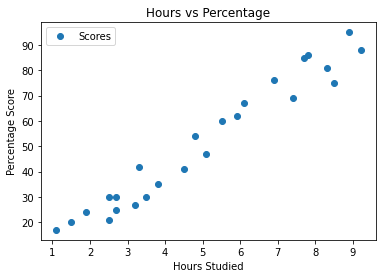

In [7]:
# Plotting the distribution of scores
task1_df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

<div class="alert alert-block alert-success">
        <b>Inference:</b> 
            <p> -  From the above graph we can see that there is a positive linear relationship between Hours studied and Score %</p>
</div>

### 3. Data Preparation

In [8]:
X = task1_df.iloc[:, :-1].values  
y = task1_df.iloc[:, 1].values

print('X :', X)
print('Y :', y)

X : [[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
Y : [21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


### 4. Train Test Split

In [9]:
#Splitting, Training and Testing the Dataset 
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.3, random_state=100)

In [10]:
print('X Train Shape', X_train.shape)
print('Y Train Shape', y_train.shape)
print('X Test Shape', X_test.shape)
print('Y Test Shape', y_test.shape)

X Train Shape (17, 1)
Y Train Shape (17,)
X Test Shape (8, 1)
Y Test Shape (8,)


In [11]:
from sklearn.linear_model import LinearRegression  
df_linearReg = LinearRegression()  
df_linearReg.fit(X_train, y_train) 

LinearRegression()

In [12]:
pred_y = df_linearReg.predict(X_test)
prediction = pd.DataFrame({'Hours': [i[0] for i in X_test], 'Predicted Marks': [k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,2.7,28.148771
1,3.8,39.007657
2,3.3,34.071800
3,5.9,59.738257
4,1.5,16.302714
5,7.4,74.545829
6,6.9,69.609972
7,4.8,48.879371


In [13]:
print('Coefficient', df_linearReg.coef_)
print('Intercept', df_linearReg.intercept_)

Coefficient [9.87171443]
Intercept 1.495142109236383


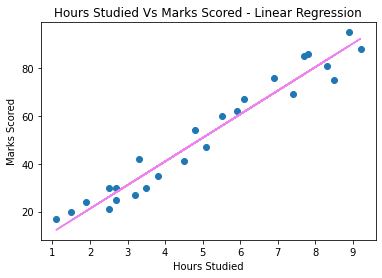

In [14]:
# Plotting the regression line
line = df_linearReg.coef_*X+df_linearReg.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line, color='violet');
plt.xlabel('Hours Studied')
plt.ylabel('Marks Scored')
plt.title('Hours Studied Vs Marks Scored - Linear Regression')
plt.show()

### 5. Prediction on the Dataset

In [15]:
print(X_test) # Testing data - In Hours
y_pred = df_linearReg.predict(X_test) # Predicting the scores

[[2.7]
 [3.8]
 [3.3]
 [5.9]
 [1.5]
 [7.4]
 [6.9]
 [4.8]]


In [16]:
print(y_pred)

[28.14877107 39.00765694 34.07179972 59.73825724 16.30271375 74.54582888
 69.60997167 48.87937137]


In [17]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,25,28.148771
1,35,39.007657
2,42,34.071800
3,62,59.738257
4,20,16.302714
5,69,74.545829
6,76,69.609972
7,54,48.879371


In [18]:
# You can also test with your own data
hours = 9.25
own_pred = df_linearReg.predict([[hours]])
print('No of Hours = {}'.format(hours))
print("Predicted Score = {0:.2f}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 92.81


### 6. Model Evaluation

In [19]:
from sklearn.metrics import mean_squared_error

rsqr = df_linearReg.score(X_test, y_test)
print('R Squared : {0:.2f}'.format(rsqr*100),'%')
meanSqr = np.sqrt(mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error : {0:.2f}'.format(meanSqr))

R Squared : 93.09 %
Root Mean Squared Error : 5.07
